In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Загрузка датасетов

In [2]:
red_data = pd.read_csv('/content/winequality-red.csv',sep=';')
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_data = pd.read_csv('/content/winequality-white.csv', sep=';')
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Объединение датасетов

In [4]:
wine_data = pd.concat([red_data, white_data], ignore_index=True)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Разделение на тренировочный и тестовый датасеты

In [5]:
train, test = train_test_split(wine_data, test_size=0.2)

In [6]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
4561,6.9,0.380,0.38,13.1,0.112,14.0,94.0,0.99792,3.02,0.48,9.2,5
3684,7.9,0.170,0.32,1.6,0.053,47.0,150.0,0.99480,3.29,0.76,9.6,6
4077,6.3,0.270,0.37,7.9,0.047,58.0,215.0,0.99542,3.19,0.48,9.5,6
5915,7.2,0.585,0.20,10.4,0.086,17.0,94.0,0.99681,3.13,0.40,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5.9,0.250,0.24,7.4,0.044,21.0,113.0,0.99462,3.38,0.58,10.5,6
1207,9.9,0.720,0.55,1.7,0.136,24.0,52.0,0.99752,3.35,0.94,10.0,5
1968,7.1,0.390,0.35,12.5,0.044,26.0,72.0,0.99410,3.17,0.29,11.6,5
5109,7.0,0.220,0.24,11.0,0.041,75.0,167.0,0.99508,2.98,0.56,10.5,6


In [7]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3693,6.6,0.22,0.53,15.1,0.052,22.0,136.0,0.99860,2.94,0.35,9.4,5
2141,5.5,0.35,0.35,1.1,0.045,14.0,167.0,0.99200,3.34,0.68,9.9,6
3880,6.3,0.16,0.22,1.3,0.046,18.0,66.0,0.99307,3.61,0.55,10.3,6
2315,7.7,0.42,0.31,9.2,0.048,22.0,221.0,0.99690,3.06,0.61,9.2,6
2319,6.6,0.29,0.44,9.0,0.053,62.0,178.0,0.99685,3.02,0.45,8.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2694,5.3,0.24,0.33,1.3,0.033,25.0,97.0,0.99060,3.59,0.38,11.0,8
4291,6.9,0.31,0.32,1.2,0.024,20.0,166.0,0.99208,3.05,0.54,9.8,6
1650,6.6,0.25,0.29,1.1,0.068,39.0,124.0,0.99140,3.34,0.58,11.0,7
3002,7.1,0.26,0.31,2.2,0.044,29.0,128.0,0.99370,3.34,0.64,10.9,8


Разделение на x_train, y_train, x_test и y_test

In [8]:
x_train = train.iloc[:,0:11]
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2
4561,6.9,0.380,0.38,13.1,0.112,14.0,94.0,0.99792,3.02,0.48,9.2
3684,7.9,0.170,0.32,1.6,0.053,47.0,150.0,0.99480,3.29,0.76,9.6
4077,6.3,0.270,0.37,7.9,0.047,58.0,215.0,0.99542,3.19,0.48,9.5
5915,7.2,0.585,0.20,10.4,0.086,17.0,94.0,0.99681,3.13,0.40,9.4
...,...,...,...,...,...,...,...,...,...,...,...
5904,5.9,0.250,0.24,7.4,0.044,21.0,113.0,0.99462,3.38,0.58,10.5
1207,9.9,0.720,0.55,1.7,0.136,24.0,52.0,0.99752,3.35,0.94,10.0
1968,7.1,0.390,0.35,12.5,0.044,26.0,72.0,0.99410,3.17,0.29,11.6
5109,7.0,0.220,0.24,11.0,0.041,75.0,167.0,0.99508,2.98,0.56,10.5


In [9]:
y_train = train.iloc[:,11]
y_train

325     6
4561    5
3684    6
4077    6
5915    5
       ..
5904    6
1207    5
1968    5
5109    6
5999    5
Name: quality, Length: 5197, dtype: int64

In [10]:
x_test = test.iloc[:,0:11]
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3693,6.6,0.22,0.53,15.1,0.052,22.0,136.0,0.99860,2.94,0.35,9.4
2141,5.5,0.35,0.35,1.1,0.045,14.0,167.0,0.99200,3.34,0.68,9.9
3880,6.3,0.16,0.22,1.3,0.046,18.0,66.0,0.99307,3.61,0.55,10.3
2315,7.7,0.42,0.31,9.2,0.048,22.0,221.0,0.99690,3.06,0.61,9.2
2319,6.6,0.29,0.44,9.0,0.053,62.0,178.0,0.99685,3.02,0.45,8.9
...,...,...,...,...,...,...,...,...,...,...,...
2694,5.3,0.24,0.33,1.3,0.033,25.0,97.0,0.99060,3.59,0.38,11.0
4291,6.9,0.31,0.32,1.2,0.024,20.0,166.0,0.99208,3.05,0.54,9.8
1650,6.6,0.25,0.29,1.1,0.068,39.0,124.0,0.99140,3.34,0.58,11.0
3002,7.1,0.26,0.31,2.2,0.044,29.0,128.0,0.99370,3.34,0.64,10.9


In [11]:
y_test = test.iloc[:,11]
y_test

3693    5
2141    6
3880    6
2315    6
2319    5
       ..
2694    8
4291    6
1650    7
3002    8
5013    7
Name: quality, Length: 1300, dtype: int64

Нормализация данных

In [12]:
standart_scaler = StandardScaler()
x_train = standart_scaler.fit_transform(x_train)
x_test = standart_scaler.fit_transform(x_test)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Создание модели

In [15]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dense(10, activation='sigmoid'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Обучение

In [30]:
history = model.fit(x_train, y_train, epochs=5, batch_size=100,validation_split=0.1)

Epoch 1/5
47/47 [==============================] - 0s 4ms/step - loss: 1.1010 - accuracy: 0.5442 - val_loss: 1.1479 - val_accuracy: 0.5519
Epoch 2/5
47/47 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.5474 - val_loss: 1.1467 - val_accuracy: 0.5596
Epoch 3/5
47/47 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.5482 - val_loss: 1.1455 - val_accuracy: 0.5635
Epoch 4/5
47/47 [==============================] - 0s 3ms/step - loss: 1.0959 - accuracy: 0.5510 - val_loss: 1.1445 - val_accuracy: 0.5615
Epoch 5/5
47/47 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.5499 - val_loss: 1.1435 - val_accuracy: 0.5596


Проверка модели

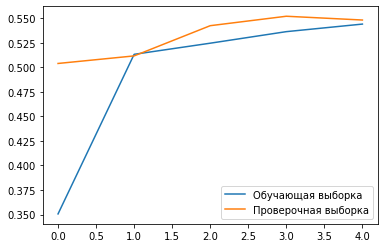

In [18]:
plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Проверочная выборка')
plt.legend()
plt.show()

In [19]:
scores = model.evaluate(x_test, y_test)
print(round(scores[1]*100, 4))

41/41 [==============================] - 0s 2ms/step - loss: 1.1354 - accuracy: 0.5400
54.0


Создание лучшей модели с помощью Keras Tuner

In [20]:
!pip install -U keras-tuner
from keras_tuner.tuners import RandomSearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 9.6 MB/s 
     |████████████████████████████████| 1.6 MB 58.4 MB/s 


In [27]:
def build_model(hp):
  model_tuner = Sequential()
  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh'])
  model_tuner.add(Dense(units=hp.Int('units_input',
                               min_value=5,
                               max_value=50,
                               step=5),
                  input_dim=x_train.shape[1],
                  activation=activation_choice))
  for i in range(hp.Int('num_layers', 0,2)):
    model_tuner.add(Dense(units=hp.Int('units_'+str(i),
                                 min_value=5,
                                 max_value=50,
                                 step=5),
                    activation=activation_choice))
  model_tuner.add(Dense(10, activation='softmax'))

  model_tuner.compile(
      optimizer=hp.Choice('optimizer', values=['Adam', 'rmsprop', 'SGD']),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
  
  return model_tuner

In [28]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=300,
    directory='test_directory'
)

In [29]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 50, 'step': 5, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 2, 'step': 1, 'sampling': None}
optimizer (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam', 'rmsprop', 'SGD'], 'ordered': False}


In [31]:
tuner.search(
    x_train,
    y_train,
    batch_size=100,
    epochs=5,
    validation_split=0.1)

Trial 300 Complete [00h 00m 02s]
val_accuracy: 0.5192307829856873

Best val_accuracy So Far: 0.5692307949066162
Total elapsed time: 00h 08m 43s


In [38]:
models = tuner.get_best_models(num_models=5)
for m in models:
  m.summary()
  m.evaluate(x_test, y_test)
  print()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                300       
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 40)                640       
                                                                 
 dense_3 (Dense)             (None, 10)                410       
                                                                 
Total params: 1,740
Trainable params: 1,740
Non-trainable params: 0
_________________________________________________________________
41/41 [==============================] - 0s 2ms/step - loss: 1.1310 - accuracy: 0.5385

Model: "sequential"
_________________________________________________________________
 Layer (type

In [33]:
tuner.get_best_hyperparameters()[0].values

{'activation': 'tanh',
 'units_input': 25,
 'num_layers': 2,
 'optimizer': 'rmsprop',
 'units_0': 15,
 'units_1': 40}

In [36]:
model_tuner = tuner.get_best_models()[0]

In [37]:
scores = model_tuner.evaluate(x_test, y_test)
print(round(scores[1]*100,4))

41/41 [==============================] - 0s 4ms/step - loss: 1.1310 - accuracy: 0.5385
53.8462
